# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
%pip install seaborn 

You should consider upgrading via the '/root/miniconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf
import seaborn as sns
%matplotlib inline

In [3]:
data_dir = "./data/train/*.tfrecord"
dataset = get_dataset(data_dir)

INFO:tensorflow:Reading unweighted datasets: ['./data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
def display_images(batch):
    try:
        # color map
        color_map = {1: 'red', 2: 'blue', 4: 'green'}
    
    
        fig, ax = plt.subplots() 
        im = batch["image"].numpy()
        ax.imshow(im)
    
        # draw bounding boxes and add color to different class labels
        for coord, label in zip(batch["groundtruth_boxes"].numpy(), batch["groundtruth_classes"].numpy()):
            xy = (coord[1]*im.shape[1], coord[0]*im.shape[0])
            #taken from class notes
            width = (coord[3] - coord[1])*im.shape[1]
            height = (coord[2] - coord[0])*im.shape[0]
            rec = patches.Rectangle(xy, width, height, linewidth=1, edgecolor=color_map[label], facecolor='none')
            ax.add_patch(rec)
        plt.axis("off")
    except Exception as err:
        print(err)
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 720x720 with 0 Axes>

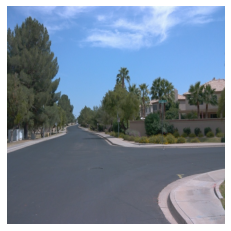

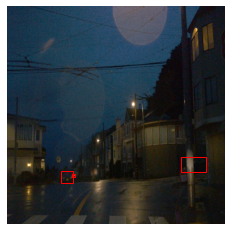

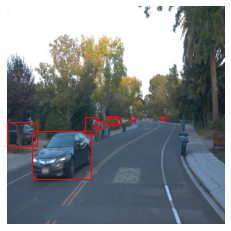

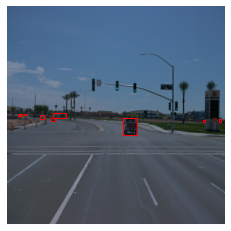

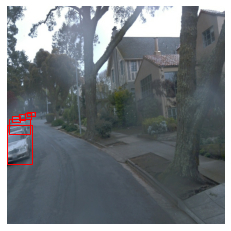

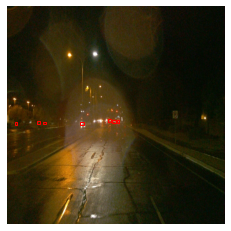

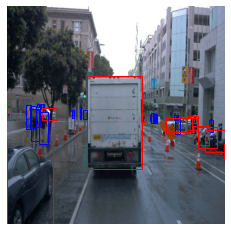

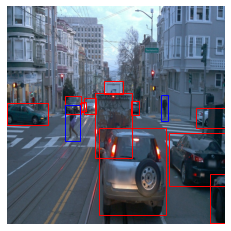

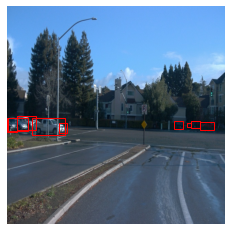

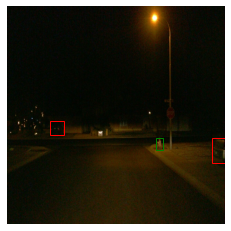

In [5]:
# Display 10 random images in dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    for batch in dataset.shuffle(15, reshuffle_each_iteration=True).take(1):
        display_images(batch)
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [6]:
labels = {1: 0, 2 : 0, 4: 0 }
labels_dist= {1:[], 2:[], 4:[]}


for batches in dataset.take(20000):
    #map using dict
    try:
        obj_count = {1: 0, 2 : 0, 4: 0 }
        for l in batches["groundtruth_classes"].numpy():
            labels[l] += 1
            object_count[l] += 1
            labels_dist[l].append(object_count[l])
    except Exception as err:
        print(err)

In [7]:
labels

{1: 352944, 2: 109811, 4: 2833}

[Text(0, 0.5, 'Number of Objects'),
 Text(0.5, 0, 'Classes'),
 Text(0.5, 1.0, 'Distrubution of Classes for 20000 random images')]

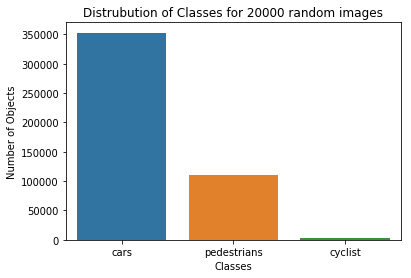

In [8]:
import seaborn as sns

label_map = {"cars": labels[1], "pedestrians": labels[2], "cyclist": labels[4]}
keys = list(label_map.keys())

#Simple dict mapping to convert to labels from strings
vals = [label_map[k] for k in keys]

# plot
ax = sns.barplot(x=keys, y=vals)
ax.set(xlabel='Classes', ylabel='Number of Objects', title='Distrubution of Classes for 20000 random images')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Number of Cars'),
 Text(0.5, 1.0, 'Distribution of Number of Cars in Images')]

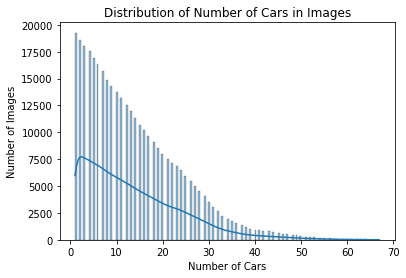

In [12]:
label_dist_map = {"cars": labels_dist[1], "pedestrians": labels_dist[2], "cyclist": labels_dist[4]}
ax_cars = sns.histplot(data=label_dist_map["cars"], kde=True)
ax_cars.set(xlabel='Number of Cars', ylabel='Number of Images', title='Distribution of Number of Cars in Images')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


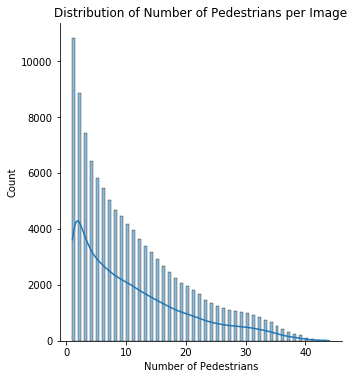

In [13]:
ax_ped= sns.displot(label_dist_map["pedestrians"], kde=True)
ax_ped.set(xlabel='Number of Pedestrians', title='Distribution of Number of Pedestrians per Image')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 1080x1080 with 0 Axes>

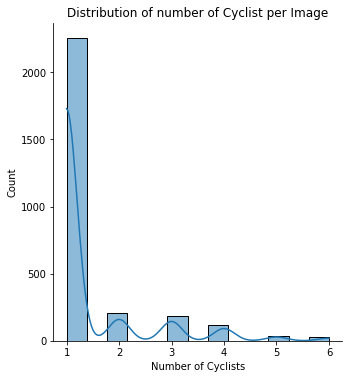

In [14]:
plt.figure(figsize=(15, 15))
ax_cy= sns.displot(label_dist_map["cyclist"], kde=True)
ax_cy.set(xlabel='Number of Cyclists', title='Distribution of number of Cyclist per Image')
plt.show()